<a href="https://colab.research.google.com/github/IrfanKpm/machine-learning-diaries/blob/main/TensorFlow/_006_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import cv2
import pathlib
import numpy as np
from PIL import Image
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
print("TensorFlow version:", tf.__version__)
print("TensorFlow Hub version:", hub.__version__)

TensorFlow version: 2.15.0
TensorFlow Hub version: 0.16.1


## to fix bug

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7ad1a4775bd0> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [3]:
!pip install tensorflow==2.15.0 tensorflow-hub keras==2.15.0

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes

In [8]:
print("TensorFlow version:", tf.__version__)
print("TensorFlow Hub version:", hub.__version__)

TensorFlow version: 2.15.0
TensorFlow Hub version: 0.16.1


In [9]:
IMAGE_SHAPE = (224, 224)

# Load the MobileNetV2 model from TensorFlow Hub
classifier = tf.keras.Sequential([
    hub.KerasLayer(
        "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",
        input_shape=IMAGE_SHAPE + (3,)
    )
])

In [10]:
test1 = "/content/test1.jpg"

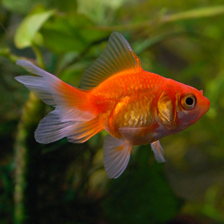

In [11]:
img1_ = Image.open(test1).resize(IMAGE_SHAPE)
img1_

In [12]:
img1 = np.array(img1_) / 255.0
img1.shape

(224, 224, 3)

In [13]:
img1 = np.expand_dims(img1, axis=0)
img1.shape

(1, 224, 224, 3)

In [14]:
y_pred = classifier.predict(img1)

1/1 [==============================] - 1s 1s/step


In [15]:
y_pred

array([[ 0.22101423,  2.0474901 ,  9.62256   , ..., -1.4621569 ,
        -0.2814654 , -0.2598486 ]], dtype=float32)

In [16]:
y_pred.shape

(1, 1001)

In [17]:
np.argmax(y_pred)

2

In [18]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

In [19]:
predicted_class_name = imagenet_labels[np.argmax(y_pred)]

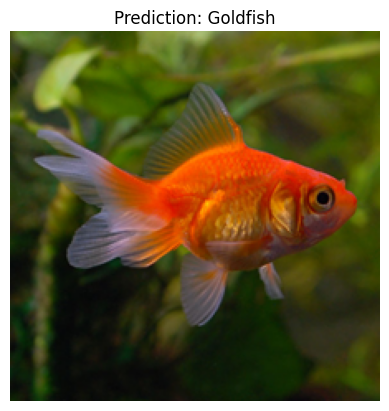

In [20]:
plt.imshow(img1_)
plt.axis('off')
_ = plt.title("Prediction: " + predicted_class_name.title())

In [21]:
def predict(path):
    img1_ = Image.open(path).resize(IMAGE_SHAPE)
    img1 = np.array(img1_) / 255.0
    img1 = np.expand_dims(img1, axis=0)
    n = np.argmax(classifier.predict(img1))
    predicted_class_name = imagenet_labels[n]
    plt.imshow(img1_)
    plt.axis('off')
    _ = plt.title("Prediction: " + predicted_class_name.title())


1/1 [==============================] - 0s 51ms/step


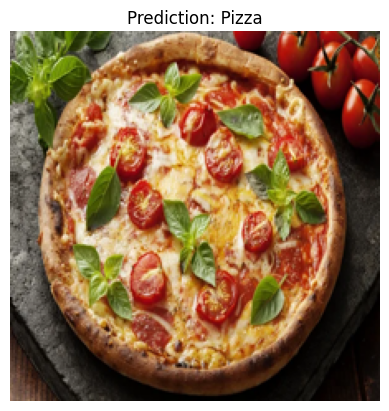

In [22]:
predict("/content/test2.jpg")

In [23]:
# Step 1: Download the dataset to the /content/ directory
dataset_url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(
    'flower_photos',
    origin=dataset_url,
    untar=True,
    cache_dir='/content',  # Specify the directory where you want to download the dataset
    cache_subdir=''  # Leave the subdir as empty to keep it directly under /content/
)

In [24]:
# Step 2: Set the data directory
data_dir = pathlib.Path(data_dir)

In [25]:
data_dir

PosixPath('/content/flower_photos')

In [26]:
# Optional: Print the number of images
image_count = len(list(data_dir.glob('*/*.jpg')))
print(f"Number of images: {image_count}")

Number of images: 3670


In [27]:
# Navigate to the 'daisy' subdirectory
daisy_dir = data_dir / 'daisy'

# Step 3: List the first 5 JPG files in the 'daisy' directory
daisy_images = list(daisy_dir.glob('*.jpg'))[:5]

# Step 4: Print the filenames
for image_path in daisy_images:
    print(image_path.name)

163978992_8128b49d3e_n.jpg
1374193928_a52320eafa.jpg
1354396826_2868631432_m.jpg
2498632196_e47a472d5a.jpg
3379332157_04724f6480.jpg


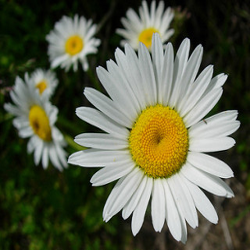

In [28]:
Image.open(daisy_dir/'163978992_8128b49d3e_n.jpg').resize((250,250))

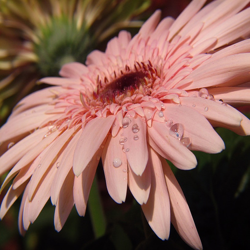

In [29]:
Image.open(daisy_dir/'1374193928_a52320eafa.jpg').resize((250,250))

In [30]:
# Navigate to the 'roses' subdirectory
roses_dir = data_dir / 'roses'

roses_images = list(roses_dir.glob('*.jpg'))[:5]

# Step 4: Print the filenames
for image_path in roses_images:
    print(image_path.name)

4505921907_21c8002fde.jpg
15202632426_d88efb321a_n.jpg
6111589202_8b9555364c_m.jpg
5777669976_a205f61e5b.jpg
15424480096_45bb574b33.jpg


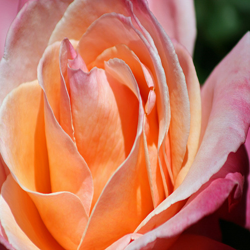

In [31]:
Image.open(roses_dir/'4505921907_21c8002fde.jpg').resize((250,250))

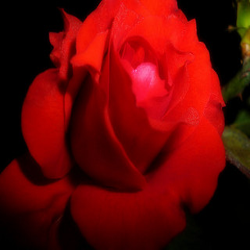

In [32]:
Image.open(roses_dir/'15202632426_d88efb321a_n.jpg').resize((250,250))

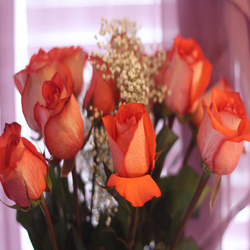

In [33]:
Image.open(roses_dir/'15424480096_45bb574b33.jpg').resize((250,250))

In [34]:
flower_images_dict = {
    "roses": list(data_dir.glob("roses/*.jpg")),
    "daisy": list(data_dir.glob("daisy/*.jpg")),
    "tulips": list(data_dir.glob("tulips/*.jpg")),
    "sunflowers": list(data_dir.glob("sunflowers/*.jpg")),
    "dandelion": list(data_dir.glob("dandelion/*.jpg"))
}

In [35]:
flower_images_dict['daisy'][:10]

[PosixPath('/content/flower_photos/daisy/163978992_8128b49d3e_n.jpg'),
 PosixPath('/content/flower_photos/daisy/1374193928_a52320eafa.jpg'),
 PosixPath('/content/flower_photos/daisy/1354396826_2868631432_m.jpg'),
 PosixPath('/content/flower_photos/daisy/2498632196_e47a472d5a.jpg'),
 PosixPath('/content/flower_photos/daisy/3379332157_04724f6480.jpg'),
 PosixPath('/content/flower_photos/daisy/14114116486_0bb6649bc1_m.jpg'),
 PosixPath('/content/flower_photos/daisy/3963330924_6c6a3fa7be_n.jpg'),
 PosixPath('/content/flower_photos/daisy/2556503265_63ae6b9e0e_m.jpg'),
 PosixPath('/content/flower_photos/daisy/299129811_d6ebda9970.jpg'),
 PosixPath('/content/flower_photos/daisy/16360180712_b72695928c_n.jpg')]

In [36]:
flower_labels = {
    "roses": 0,
    "daisy": 1,
    "tulips": 2,
    "sunflowers": 3,
    "dandelion": 4
}

In [37]:
daisy_15_path = str(flower_images_dict['daisy'][15])

daisy_15_path

'/content/flower_photos/daisy/6323721068_3d3394af6d_n.jpg'

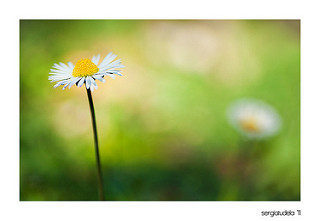

In [38]:
daisy_15 = Image.open(daisy_15_path)
daisy_15

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
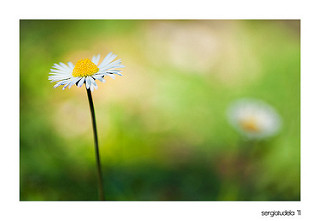

In [39]:
daisy_15_np = np.array(daisy_15)
daisy_15_np

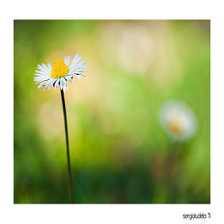

In [40]:
daisy_15 = daisy_15.resize(IMAGE_SHAPE)
daisy_15

In [41]:
np.array(daisy_15).shape

(224, 224, 3)

In [42]:
X = []
y = []

for flower_names,images in flower_images_dict.items():
   for image in images:
     img = Image.open(image).resize(IMAGE_SHAPE)
     X.append(np.array(img))
     y.append(flower_labels[flower_names])

In [43]:
# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

In [44]:
X.shape

(3670, 224, 224, 3)

In [45]:
y.shape

(3670,)

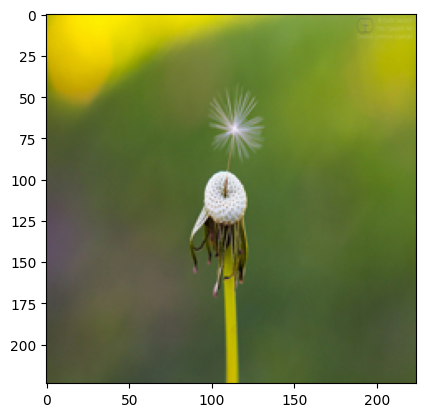

In [46]:
plt.imshow(X[3100])

In [85]:
X[3100].shape

(224, 224, 3)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
X_train = X_train/255.0
X_test = X_test/255.0

In [50]:
X_train[0]

array([[[0.92156863, 0.62352941, 0.87843137],
        [0.9372549 , 0.61568627, 0.88235294],
        [0.89411765, 0.59607843, 0.85882353],
        ...,
        [0.88235294, 0.35686275, 0.67843137],
        [0.89803922, 0.41960784, 0.73333333],
        [0.90588235, 0.44313725, 0.80392157]],

       [[0.94509804, 0.62352941, 0.88627451],
        [0.94509804, 0.60392157, 0.8745098 ],
        [0.90980392, 0.57647059, 0.84705882],
        ...,
        [0.87058824, 0.32941176, 0.65882353],
        [0.89803922, 0.41568627, 0.74117647],
        [0.91372549, 0.4627451 , 0.81568627]],

       [[0.94901961, 0.58823529, 0.85882353],
        [0.94509804, 0.56078431, 0.84313725],
        [0.92156863, 0.53333333, 0.81960784],
        ...,
        [0.85882353, 0.31372549, 0.65490196],
        [0.89019608, 0.41176471, 0.7372549 ],
        [0.90196078, 0.45098039, 0.8       ]],

       ...,

       [[0.83921569, 0.30196078, 0.58431373],
        [0.84705882, 0.31764706, 0.6       ],
        [0.85098039, 0

In [51]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

feature_extractor_layer = hub.KerasLayer(
    classifier,
    input_shape=(224, 224, 3),
    trainable=False)

In [52]:
n_of_flowers = 5

model = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dense(n_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 5)                 5010      
                                                                 
Total params: 3545275 (13.52 MB)
Trainable params: 5010 (19.57 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [53]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=5,
    validation_split=0.2  # Optional: include a validation split
)
print("Training complete. History:", history.history)

Epoch 1/5
74/74 [==============================] - 108s 1s/step - loss: 0.7928 - accuracy: 0.7027 - val_loss: 0.4686 - val_accuracy: 0.8401
Epoch 2/5
74/74 [==============================] - 89s 1s/step - loss: 0.3627 - accuracy: 0.8710 - val_loss: 0.3992 - val_accuracy: 0.8741
Epoch 3/5
74/74 [==============================] - 88s 1s/step - loss: 0.2853 - accuracy: 0.9076 - val_loss: 0.3842 - val_accuracy: 0.8759
Epoch 4/5
74/74 [==============================] - 88s 1s/step - loss: 0.2373 - accuracy: 0.9221 - val_loss: 0.3783 - val_accuracy: 0.8844
Epoch 5/5
74/74 [==============================] - 93s 1s/step - loss: 0.2080 - accuracy: 0.9348 - val_loss: 0.3850 - val_accuracy: 0.8793
Training complete. History: {'loss': [0.7928488254547119, 0.36271053552627563, 0.2853230834007263, 0.2373097538948059, 0.2079518884420395], 'accuracy': [0.7027257084846497, 0.8709539771080017, 0.9075809121131897, 0.9220613241195679, 0.9348381757736206], 'val_loss': [0.4686245024204254, 0.399213403463363

In [54]:
# Print the training history for verification
print("Training complete. History:", history.history)

Training complete. History: {'loss': [0.7928488254547119, 0.36271053552627563, 0.2853230834007263, 0.2373097538948059, 0.2079518884420395], 'accuracy': [0.7027257084846497, 0.8709539771080017, 0.9075809121131897, 0.9220613241195679, 0.9348381757736206], 'val_loss': [0.4686245024204254, 0.39921340346336365, 0.3841617703437805, 0.3783353567123413, 0.3850218653678894], 'val_accuracy': [0.8401360511779785, 0.8741496801376343, 0.8758503198623657, 0.884353756904602, 0.8792517185211182]}


In [55]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

# Print the evaluation results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

23/23 - 23s - loss: 0.3605 - accuracy: 0.8856 - 23s/epoch - 1s/step
Test Loss: 0.3605
Test Accuracy: 0.8856
